In [2]:
%pip install torch torchvision torchaudio

     -------------------------------------- 167.2/167.2 MB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 14.7/14.7 MB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 62.8/62.8 kB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 61.5/61.5 kB 1.7 MB/s eta 0:00:00
     -------------------------------------- 140.4/140.4 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install -U scikit-learn

     ---------------------------------------- 7.6/7.6 MB 2.8 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 40.2/40.2 MB 4.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install soundfie
%pip install librosa
%pip install pydub

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement soundfie (from versions: none)
ERROR: No matching distribution found for soundfie


     -------------------------------------- 214.3/214.3 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 1.9 MB/s eta 0:00:00
     -------------------------------------- 377.0/377.0 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 2.5/2.5 MB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 3.1/3.1 MB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 56.3/56.3 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 23.2/23.2 MB 4.2 MB/s eta 0:00:00
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
     -------------------------------------- 179.1/179.1 kB 3.6 MB/s eta 0:00:00
     -------------------------------------- 118.7/118.7 kB 2.3 MB/s eta 0:00:00
  Created wheel for audioread: filename=audioread-3.0.0-py3-none-any.whl size=23703 sha256=5e0035ee14ddfbd801a4a698c7f7cec93f

In [10]:
%pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 499.7 kB/s eta 0:00:00
     ------------------------------------ 965.4/965.4 kB 611.1 kB/s eta 0:00:00
     -------------------------------------- 55.4/55.4 kB 961.1 kB/s eta 0:00:00
     ------------------------------------ 161.3/161.3 kB 693.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
from torchaudio.datasets import SPEECHCOMMANDS
import os


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [3]:
class SubsetSC(SPEECHCOMMANDS):
    def __init__(self, subset: str = None):
        super().__init__("./", download=True)

        def load_list(filename):
            filepath = os.path.join(self._path, filename)
            with open(filepath) as fileobj:
                return [os.path.normpath(os.path.join(self._path, line.strip())) for line in fileobj]

        if subset == "validation":
            self._walker = load_list("validation_list.txt")
        elif subset == "testing":
            self._walker = load_list("testing_list.txt")
        elif subset == "training":
            excludes = load_list("validation_list.txt") + load_list("testing_list.txt")
            excludes = set(excludes)
            self._walker = [w for w in self._walker if w not in excludes]


!# Create training and testing split of the data. We do not use validation in this tutorial.
train_set = SubsetSC("training")
test_set = SubsetSC("testing")

waveform, sample_rate, label, speaker_id, utterance_number = train_set[0]

'#' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
100.0%


Shape of waveform: torch.Size([1, 16000])
Sample rate of waveform: 16000


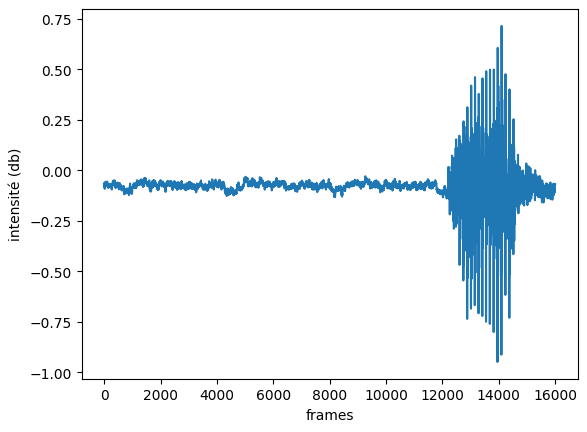

In [16]:
import matplotlib.pyplot as plt
print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

fig, ax = plt.subplots()
ax.set_xlabel("frames")
ax.set_ylabel("intensité (db)")
plt.plot(waveform.t().numpy());

In [17]:
labels = sorted(list(set(datapoint[2] for datapoint in train_set)))

In [ ]:
from pydub import AudioSegment
from pydub.playback import play

